# lesson-3

### Библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams["figure.figsize"] = (10,5)

### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X_st[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred + 1e-28) + (1.0 - y) * np.log(1.0 - y_pred + 1e-28))
    return err

In [6]:
calc_logloss(np.array([1, 1]), np.array([1, 1]))

-0.0

In [7]:
calc_logloss(np.array([1, 1]), np.array([0, 0]))

64.47238260383328

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [8]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [9]:
def eval_model(X, y, iterations, alpha=1e-4, metric: callable = None):
    np.random.seed(42)
    loss_basic = []
    abs_W_basic = []
    sqr_W_basic = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        abs_W = np.sum(np.abs(W))
        sqr_W = W.T @ W
        loss_basic.append(err)
        abs_W_basic.append(abs_W)
        sqr_W_basic.append(sqr_W)
        if i % (iterations / 10) == 0:
            print(i, err, abs_W, sqr_W)
    return W, loss_basic, abs_W_basic, sqr_W_basic

In [10]:
W, loss_basic, abs_W_basic, sqr_W_basic = eval_model(X, y, iterations=20000, alpha=1e-7)
print(W)

2000 32.23619130191664 2.713716848691144 2.8937978651129224
4000 32.23619130191664 2.6217368486911523 2.799561571948553
6000 32.23619130191664 2.529756848691161 2.7222534731841765
8000 32.23619130191664 2.4377768486911693 2.6618735688197934
10000 32.23619130191664 2.3457968486911778 2.618421858855403
12000 32.23619130191664 2.2538168486911774 2.5918983432910037
14000 2.866743321721038 2.161856352307028 2.5823033044168215
16000 0.6047441750740944 2.160562891366906 2.5822740014990213
18000 0.6047416161931483 2.160543452492413 2.582282766810411
20000 0.6047390575901483 2.160524015666768 2.5822915338857726
[ 0.49595972 -0.1400658  -0.00243045  1.52206805]


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [11]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(W @ X)
    return y_pred_proba

In [12]:
y_pred_proba = np.array(calc_pred_proba(W, X))
y_pred_proba

array([0.65987503, 0.5440474 , 0.80800941, 0.60340965, 0.40029096,
       0.51840878, 0.6717611 , 0.2315833 , 0.68659748, 0.69625237])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [13]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = [1 if k > 0.5 else 0 for k in y_pred_proba]
    return y_pred

In [14]:
y_pred = np.array(calc_pred(W, X))
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [15]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [16]:
def accuracy(y, y_pred):
    return (y == y_pred).sum() / len(y)

In [17]:
accuracy_y_pred = accuracy(y, y_pred)
accuracy_y_pred

0.5

In [18]:
def matrix_false(y, y_pred):
    TP = ((y == 1) * (y_pred == 1)).sum()
    FP = ((y == 0) * (y_pred == 1)).sum()
    FN = ((y == 1) * (y_pred == 0)).sum()
    TN = ((y == 0) * (y_pred == 0)).sum()
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [19]:
matrix_false_y_pred = matrix_false(y, y_pred)
matrix_false_y_pred

{'TP': 4, 'FP': 4, 'FN': 1, 'TN': 1}

In [20]:
def precision(y, y_pred):
    return ((y == 1) * (y_pred == 1)).sum() / (y_pred == 1).sum()

In [21]:
precision_y_pred = precision(y, y_pred)
precision_y_pred

0.5

In [22]:
def recall(y, y_pred):
    return ((y == 1) * (y_pred == 1)).sum() / (y == 1).sum()

In [23]:
recall_y_pred = recall(y, y_pred)
recall_y_pred

0.8

In [24]:
def f1_score(y, y_pred):
    return 2 * precision(y, y_pred) * recall(y, y_pred) / (precision(y, y_pred) + recall(y, y_pred))

In [25]:
f1_score_y_pred = f1_score(y, y_pred)
f1_score_y_pred

0.6153846153846154

### 6. Могла ли модель переобучиться? Почему?

 Не могла. Результаты предсказаний на тренировочной выборки маленькие. Коэффициенты логистической регрессии не велики.

### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [26]:
def eval_model_l1(X, y, iterations, alpha=1e-4, l = 0.1, metric: callable = None):
    np.random.seed(42)
    loss_L1 = []
    abs_W_L1 = []
    sqr_W_L1 = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + l * np.sign(W))
        abs_W = np.sum(np.abs(W))
        sqr_W = W.T @ W
        loss_L1.append(err)
        abs_W_L1.append(abs_W)
        sqr_W_L1.append(sqr_W)
        if i % (iterations / 10) == 0:
            print(i, err, abs_W)
    return W, loss_L1, abs_W_L1, sqr_W_L1

In [27]:
W, loss_L1, abs_W_L1, sqr_W_L1 = eval_model_l1(X, y, 20000, 1e-7, 1000)
print(W)

2000 32.23619130191664 1.975268246348757
4000 29.104281204655422 1.2829682463487555
6000 0.8424339378087973 0.9227111428337728
8000 0.7575792821827432 0.7226398264061141
10000 0.7148621153943565 0.5226396797495336
12000 0.6912535406466396 0.32272296914636445
14000 0.6809037505942748 0.12271031106175512
16000 0.6934741246960388 0.00032556647810176776
18000 0.6919182967100345 0.00025187779547534316
20000 0.6948529784972736 0.0002500101665865023
[ 8.65515735e-05  5.42445885e-05  5.50144918e-05 -5.41995128e-05]


In [28]:
def eval_model_l2(X, y, iterations, alpha=1e-4, l = 0.1, metric: callable = None):
    np.random.seed(42)
    loss_L2 = []
    sqr_W_L2 = []
    abs_W_L2 = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + l * 2 * W)
        abs_W = np.sum(np.abs(W))
        sqr_W = W.T @ W
        loss_L2.append(err)
        abs_W_L2.append(abs_W)
        sqr_W_L2.append(sqr_W)
        if i % (iterations / 10) == 0:
            print(i, err, abs_W, sqr_W)
    return W, loss_L2, abs_W_L2, sqr_W_L2

In [29]:
W, loss_L2, abs_W_L2, sqr_W_L2 = eval_model_l2(X, y, 20000, 1e-7, 1000)
print(W)

2000 32.23619130191664 1.8048235319392787 1.289764378869151
4000 32.23619130191664 1.1339449234380816 0.5486390666572624
6000 15.615529172242342 0.684259533901549 0.23543106607627304
8000 0.6628510496732356 0.43608290467703803 0.10523105200089908
10000 0.6717418430450705 0.2922929586480152 0.04728557081890719
12000 0.6780720456888931 0.19591405476196563 0.021249338944621013
14000 0.6824821511578263 0.13131363065965623 0.009550147922308891
16000 0.6855133031159981 0.08801355117329485 0.004292855826906688
18000 0.6875787920145342 0.05903729108836181 0.0019301426661623127
20000 0.6889784172130097 0.039629393095633354 0.0008681453035685806
[ 9.06908721e-03 -2.60134074e-03  4.61032083e-05  2.79128619e-02]


Визуализируем сходимость логистической регрессии c L1-регуляризацией, L2-регуляризацией и без регуляризации:

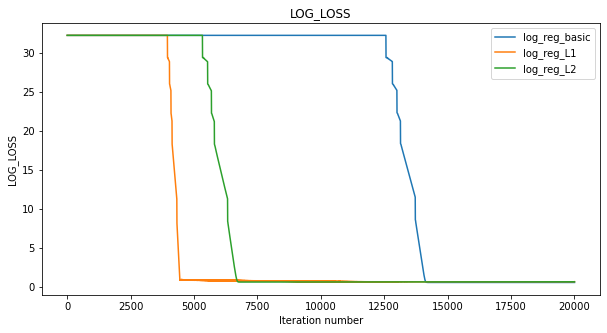

In [30]:
n1 = 0
n2 = 20000
n_iteration = [i+1 for i in range(n2 - n1)]
plt.plot(n_iteration, loss_basic[n1:n2], label = "log_reg_basic")
plt.plot(n_iteration, loss_L1[n1:n2], label = "log_reg_L1")
plt.plot(n_iteration, loss_L2[n1:n2], label = "log_reg_L2")
plt.title('LOG_LOSS')
plt.xlabel('Iteration number')
plt.ylabel('LOG_LOSS')
plt.legend()
plt.show()

Визуализируем изменение суммы абсолютных значений параметров логистической регрессии  c L1-регуляризацией, L2-регуляризацией и без регуляризации:

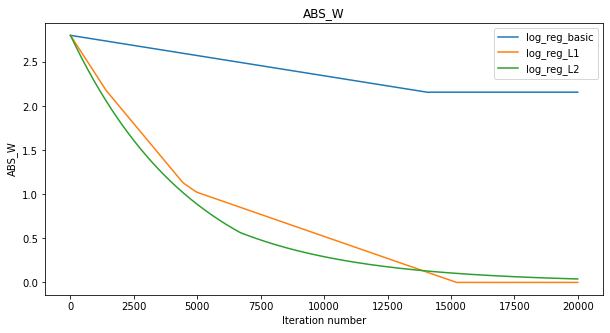

In [31]:
n1 = 0
n2 = 20000
n_iteration = [i+1 for i in range(n2 - n1)]
plt.plot(n_iteration, abs_W_basic[n1:n2], label = "log_reg_basic")
plt.plot(n_iteration, abs_W_L1[n1:n2], label = "log_reg_L1")
plt.plot(n_iteration, abs_W_L2[n1:n2], label = "log_reg_L2")
plt.title('ABS_W')
plt.xlabel('Iteration number')
plt.ylabel('ABS_W')
plt.legend()
plt.show()

Визуализируем изменение суммы квадратов параметров логистической регрессии  c L1-регуляризацией, L2-регуляризацией и без регуляризации:

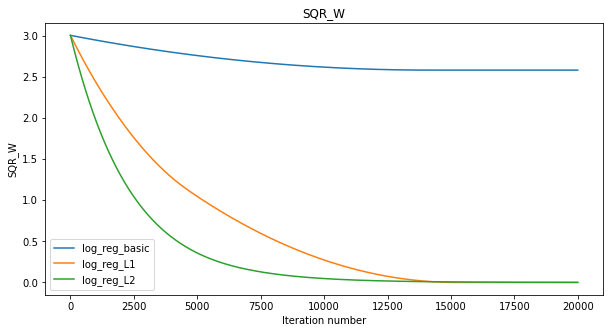

In [32]:
n1 = 0
n2 = 20000
n_iteration = [i+1 for i in range(n2 - n1)]
plt.plot(n_iteration, sqr_W_basic[n1:n2], label = "log_reg_basic")
plt.plot(n_iteration, sqr_W_L1[n1:n2], label = "log_reg_L1")
plt.plot(n_iteration, sqr_W_L2[n1:n2], label = "log_reg_L2")
plt.title('SQR_W')
plt.xlabel('Iteration number')
plt.ylabel('SQR_W')
plt.legend()
plt.show()